# Clustering Notebook

In [ ]:
#https://blog.bismart.com/en/classification-vs.-clustering-a-practical-explanation

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [7]:
np.random.seed(seed=42)

In [2]:
chi_df_base     = pd.read_csv('C:/Users/curtm/dsi/projects/DST-and-traffic-implications/data/chi_accidents.csv')
chi_df_no_nulls = pd.read_csv('C:/Users/curtm/dsi/projects/DST-and-traffic-implications/data/chi_df_no_nulls_no_words.csv')

In [3]:
chi_df_no_nulls.head()

,severity,start_time,end_time,start_lat,start_lng,end_lat,end_lng,distance(mi),number,weather_timestamp,temperature(f),wind_chill(f),humidity(%),pressure(in),visibility(mi),wind_speed(mph),precipitation(in),amenity,bump,crossing,give_way,junction,no_exit,railway,roundabout,station,stop,traffic_calming,traffic_signal,turning_loop,wind_direction_Calm,wind_direction_E,wind_direction_ENE,wind_direction_ESE,wind_direction_East,wind_direction_N,wind_direction_NE,wind_direction_NNE,wind_direction_NNW,wind_direction_NW,wind_direction_North,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_South,wind_direction_VAR,wind_direction_Variable,wind_direction_W,wind_direction_WNW,wind_direction_WSW,wind_direction_West,wind_direction_nan,weather_condition_Clear,weather_condition_Cloudy,weather_condition_Cloudy / Windy,weather_condition_Drizzle,weather_condition_Fair,weather_condition_Fair / Windy,weather_condition_Fog,weather_condition_Freezing Rain,weather_condition_Haze,weather_condition_Heavy Drizzle,weather_condition_Heavy Rain,weather_condition_Heavy Rain / Windy,weather_condition_Heavy Snow,weather_condition_Heavy T-Storm,weather_condition_Heavy T-Storm / Windy,weather_condition_Heavy Thunderstorms and Rain,weather_condition_Light Drizzle,weather_condition_Light Drizzle / Windy,weather_condition_Light Freezing Drizzle,weather_condition_Light Freezing Fog,weather_condition_Light Freezing Rain,weather_condition_Light Freezing Rain / Windy,weather_condition_Light Ice Pellets,weather_condition_Light Rain,weather_condition_Light Rain / Windy,weather_condition_Light Rain Showers,weather_condition_Light Rain with Thunder,weather_condition_Light Snow,weather_condition_Light Snow / Windy,weather_condition_Light Snow and Sleet / Windy,weather_condition_Light Thunderstorms and Rain,weather_condition_Light Thunderstorms and Snow,weather_condition_Mist,weather_condition_Mostly Cloudy,weather_condition_Mostly Cloudy / Windy,weather_condition_N/A Precipitation,weather_condition_Overcast,weather_condition_Partly Cloudy,weather_condition_Partly Cloudy / Windy,weather_condition_Patches of Fog,weather_condition_Rain,weather_condition_Rain / Windy,weather_condition_Scattered Clouds,weather_condition_Smoke,weather_condition_Snow,weather_condition_Snow / Windy,weather_condition_Squalls,weather_condition_Squalls / Windy,weather_condition_T-Storm,weather_condition_T-Storm / Windy,weather_condition_Thunder,weather_condition_Thunder in the Vicinity,weather_condition_Thunderstorm,weather_condition_Thunderstorms and Rain,weather_condition_Wintry Mix,weather_condition_Wintry Mix / Windy,weather_condition_nan,sunrise_sunset_Night,civil_twilight_Night,nautical_twilight_Night,astronomical_twilight_Night
0,2,2016-11-30 14:46:48,2016-11-30 20:46:48,42.305960,-87.960150,42.306916,-87.960918,0.077,0.0,2016-11-30 14:55:00,37.0,31.0,79.0,29.59,10.0,8.1,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2016-11-30 14:58:59,2016-11-30 20:58:59,42.175870,-88.135770,42.174620,-88.135794,0.086,21500.0,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,2016-11-30 15:14:24,2016-11-30 21:29:48,42.175897,-88.135769,42.174612,-88.135794,0.089,21501.0,2016-11-30 14:52:00,37.0,28.1,76.0,29.62,10.0,15.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,2016-11-30 16:13:53,2016-11-3

In [5]:
chi_df_no_nulls.columns

Index(['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       ...
       'weather_condition_Thunder in the Vicinity',
       'weather_condition_Thunderstorm',
       'weather_condition_Thunderstorms and Rain',
       'weather_condition_Wintry Mix', 'weather_condition_Wintry Mix / Windy',
       'weather_condition_nan', 'sunrise_sunset_Night', 'civil_twilight_Night',
       'nautical_twilight_Night', 'astronomical_twilight_Night'],
      dtype='object', length=115)

## Clustering on Severity of Acciden and Distance of accident in miles

### K-Means Clustering

In [6]:
X = chi_df_no_nulls.loc[:, ['severity', 'distance(mi)']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [10]:
km = KMeans(n_clusters= 3)
km.fit(X_sc)

KMeans(n_clusters=3)

In [11]:
km.cluster_centers_

array([[ 0.76981508, -0.10056861],
       [-1.04784931, -0.08884593],
       [ 0.56898771,  4.92460736]])

In [12]:
km.labels_

array([1, 1, 0, ..., 0, 0, 0])

In [13]:
km.predict(X_sc)

array([1, 1, 0, ..., 0, 0, 0])

In [15]:
X['cluster'] = km.predict(X_sc)

In [17]:
silhouette_score(X_sc, km.labels_)

0.7050672181895548

In [18]:
#Gridsearch ish function for k-mean clustering (from k-means 9.02 solution code)
%time
scores=[]
for k in range(2,31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia,sil])

score_df = pd.DataFrame(data=scores, columns=['k', 'inertia', 'sil'])

Wall time: 0 ns


In [22]:
score_df.sort_values('sil', ascending=False).head()

,k,inertia,sil
5,7,10604.456550,0.766008
4,6,12567.150802,0.765273
3,5,16786.127497,0.756114
2,4,23502.496732,0.716189
1,3,30916.191012,0.705067


''

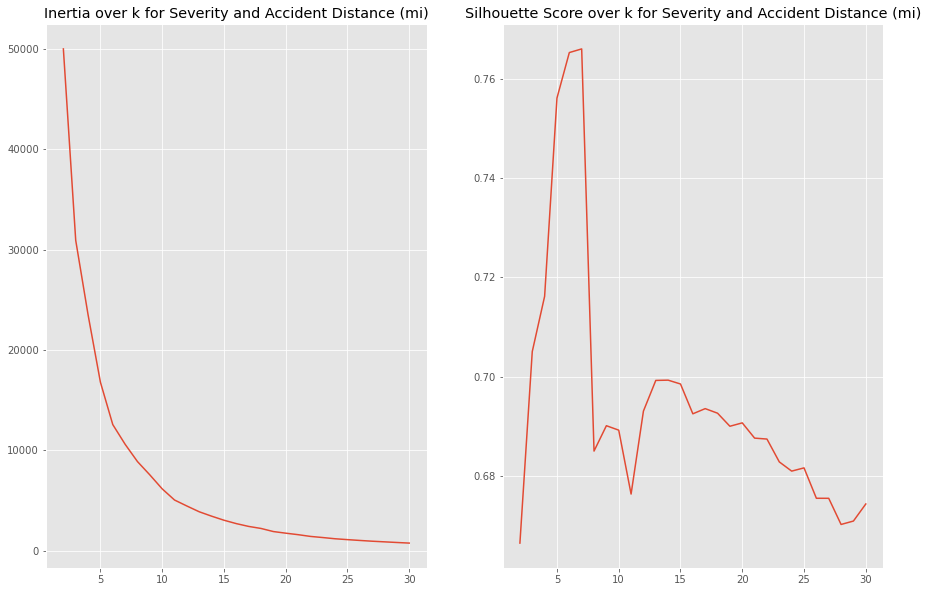

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k for Severity and Accident Distance (mi)')
axes[1].plot(score_df.k, score_df.sil)
axes[1].set_title('Silhouette Score over k for Severity and Accident Distance (mi)')
;

### Interpretation 
* Best number of clusters using K-means for Severity and Distance of accident in miles was 7 with a silhouette score of 0.766

### DBScan

In [34]:
#Default with epsilon at 0.5 and min samples set to 5
dbscan = DBSCAN()
dbscan.fit(X_sc)

DBSCAN()

In [35]:
silhouette_score(X_sc, dbscan.labels_)

0.7222807672695175

In [37]:
DBSCAN().get_params()

{'algorithm': 'auto',
 'eps': 0.5,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 5,
 'n_jobs': None,
 'p': None}

In [38]:
dbscan_2 = DBSCAN(eps=1, min_samples=4)
dbscan_2.fit(X_sc)

DBSCAN(eps=1, min_samples=4)

In [39]:
silhouette_score(X_sc, dbscan_2.labels_)

0.7160011044130468

In [42]:
dbscan = DBSCAN(eps=.25, min_samples=5)
dbscan.fit(X_sc)
silhouette_score(X_sc, dbscan.labels_)

0.7209522925115104

In [43]:
#Lets try upping the min samples to 50
dbscan = DBSCAN(eps=.5, min_samples=50)
dbscan.fit(X_sc)
silhouette_score(X_sc, dbscan.labels_)

0.732496410926851

In [48]:
#What would be 1% of the sample, 424 would be that
X.shape[0] *.01

424.07

In [49]:
#Lets try upping the min samples to 200 or 0.5% of the sample
dbscan = DBSCAN(eps=.5, min_samples=200)
dbscan.fit(X_sc)
silhouette_score(X_sc, dbscan.labels_)

0.7519849991887868

Still not much better than K-means clustering, so lets stop and move on to looking at Severity and other factors.

In [50]:
chi_df_no_nulls.columns

Index(['severity', 'start_time', 'end_time', 'start_lat', 'start_lng',
       'end_lat', 'end_lng', 'distance(mi)', 'number', 'weather_timestamp',
       ...
       'weather_condition_Thunder in the Vicinity',
       'weather_condition_Thunderstorm',
       'weather_condition_Thunderstorms and Rain',
       'weather_condition_Wintry Mix', 'weather_condition_Wintry Mix / Windy',
       'weather_condition_nan', 'sunrise_sunset_Night', 'civil_twilight_Night',
       'nautical_twilight_Night', 'astronomical_twilight_Night'],
      dtype='object', length=115)

### Severity and Start Time

In [54]:
X = chi_df_no_nulls.loc[:,['severity', 'start_time']]
X_sc = sc.fit_transform(X)

ValueError: could not convert string to float: '2016-11-30 14:46:48'